In [235]:
import numpy as np

In [236]:
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as ms

In [237]:
data=pd.read_csv('train_bank.csv')

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [239]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [240]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [241]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


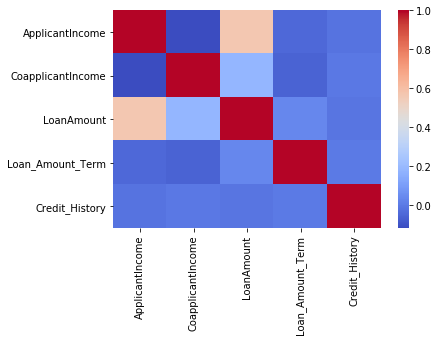

In [242]:
ses.heatmap(data.corr(),cmap='coolwarm')

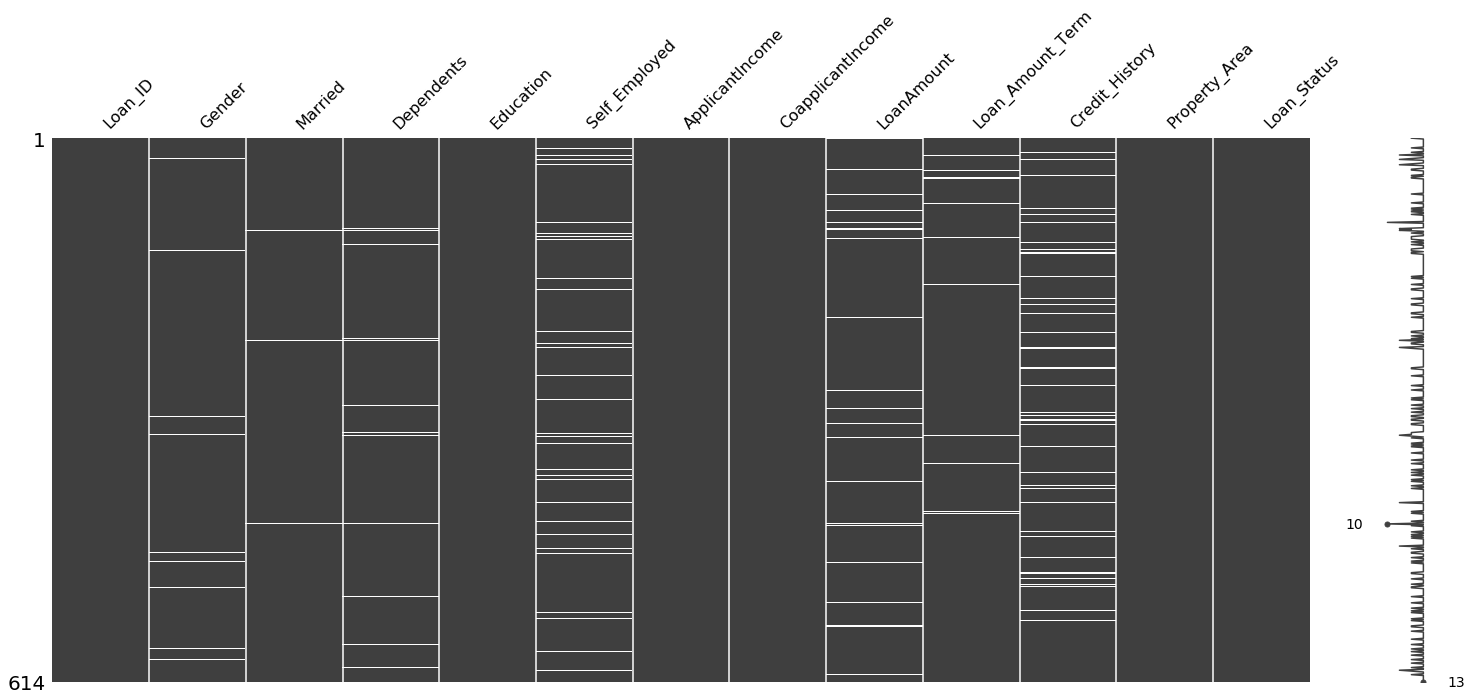

In [243]:
ms.matrix(data)

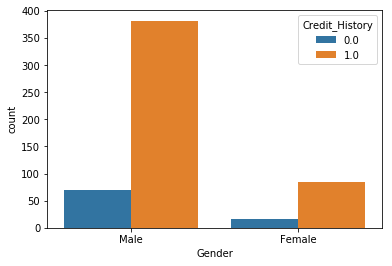

In [244]:
ses.countplot(x='Gender',hue='Credit_History',data=data)

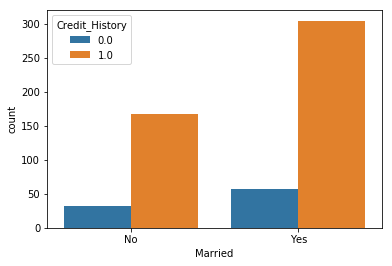

In [245]:
ses.countplot(x='Married',hue='Credit_History',data=data)

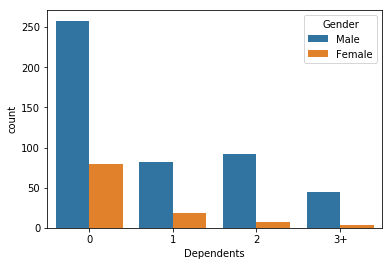

In [246]:
ses.countplot(x='Dependents',hue='Gender',data=data)

In [247]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

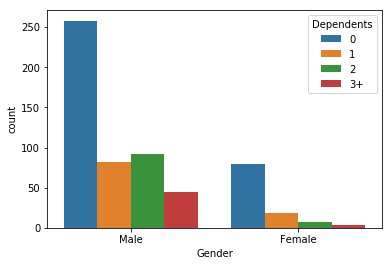

In [248]:
ses.countplot(x='Gender',hue='Dependents',data=data)

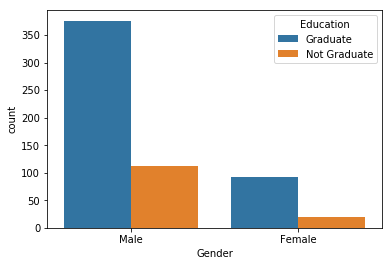

In [249]:
ses.countplot(x='Gender',hue='Education',data=data)

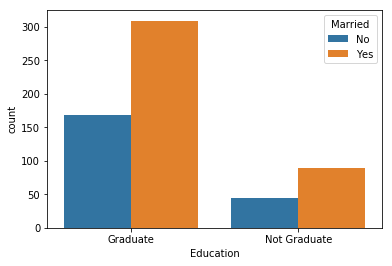

In [250]:
ses.countplot(x='Education',hue='Married',data=data)

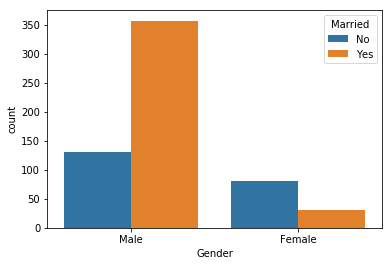

In [251]:
ses.countplot(x='Gender',hue='Married',data=data)

In [252]:
edu=pd.get_dummies(data['Education'],drop_first=True)
data=pd.concat([data,edu],axis=1)
data.drop(['Education'],axis=1,inplace=True)

In [253]:
id=data['Loan_ID']
data.drop('Loan_ID',axis=1,inplace=True)

In [254]:
not_grad=data['Not Graduate']
gender=data['Gender']
for i in range(len(id)):
    if pd.isnull(gender[i]):
        if not_grad[i]==0:
            gender[i]='Male'
        else:
            gender[i]='Female'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              611 non-null object
Dependents           599 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Not Graduate         614 non-null uint8
dtypes: float64(4), int64(1), object(6), uint8(1)
memory usage: 53.4+ KB


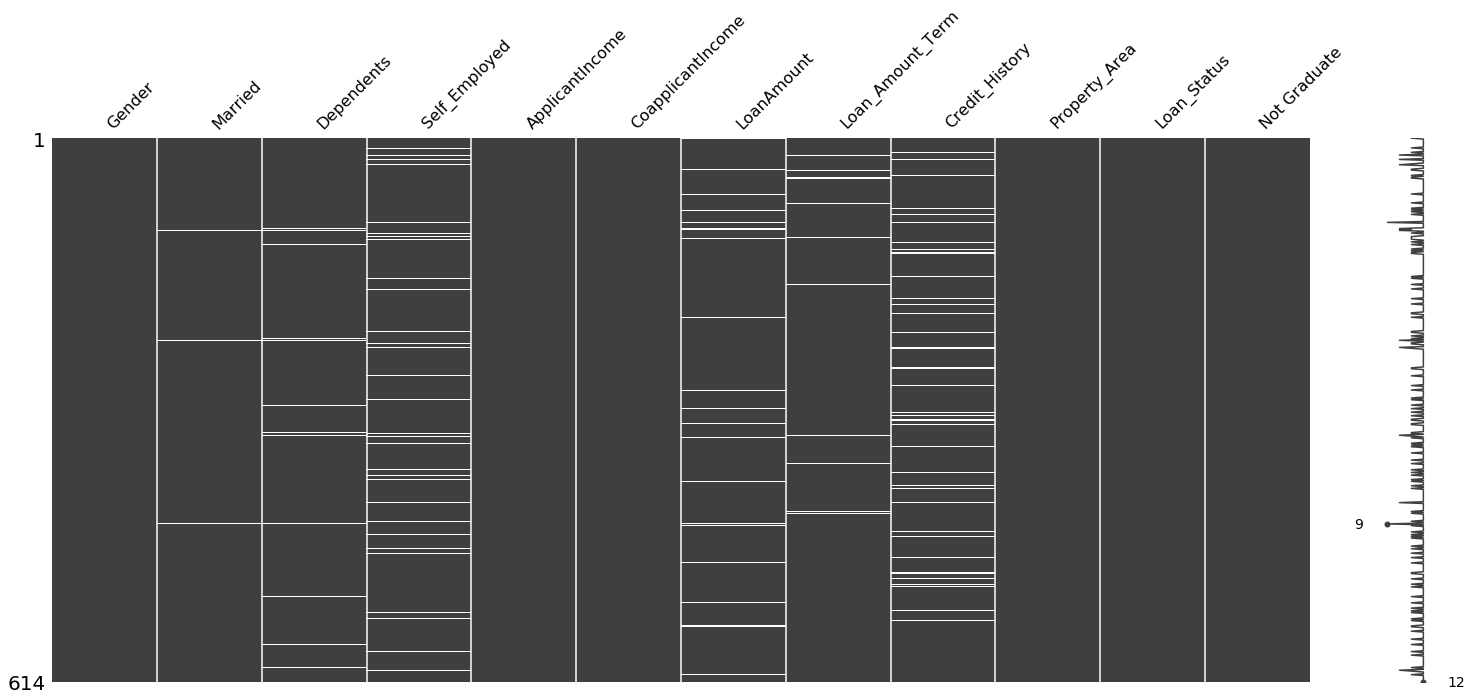

In [256]:
ms.matrix(data)

In [257]:
mar=data['Married']
inc=data['ApplicantIncome']
for i in range(len(id)):
    if pd.isnull(mar[i]):
        if inc[i]>=inc.mean():
            mar[i]='Yes'
        else:
            mar[i]='No'
            

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


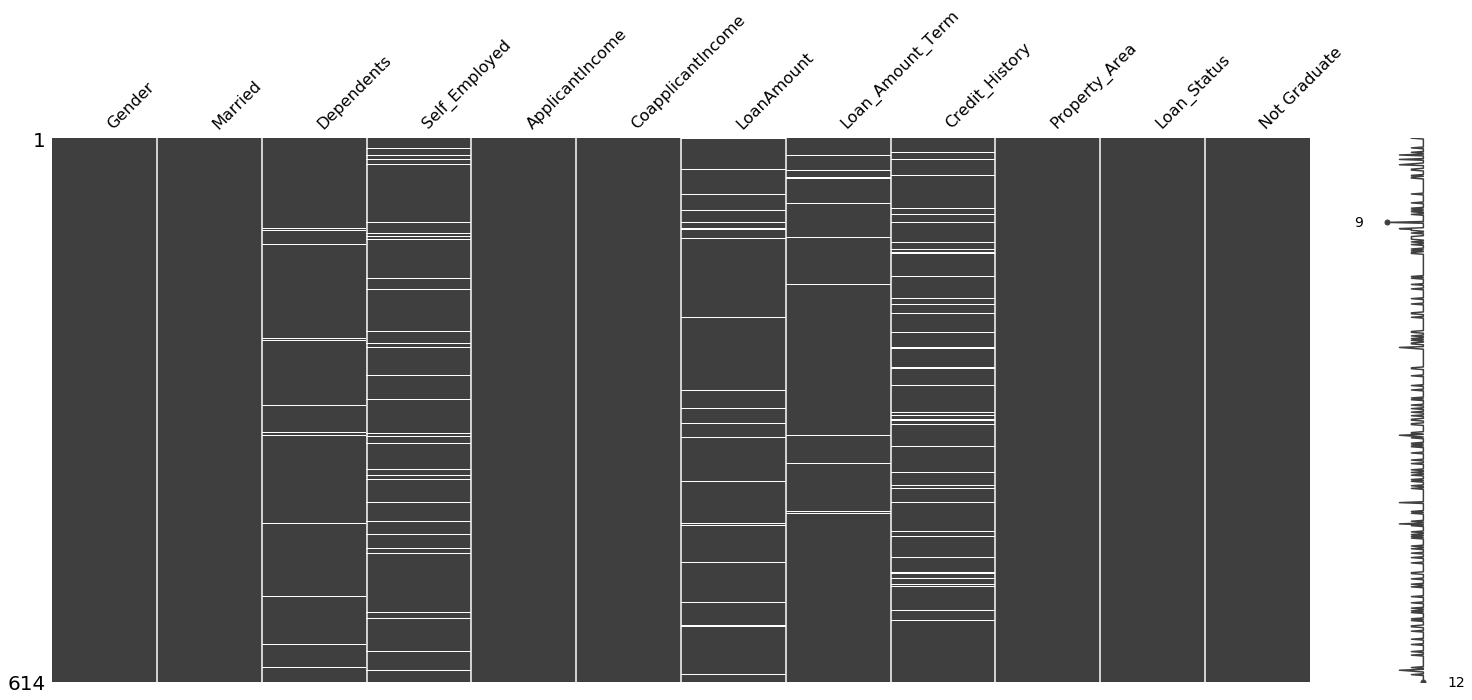

In [258]:
ms.matrix(data)

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           599 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Not Graduate         614 non-null uint8
dtypes: float64(4), int64(1), object(6), uint8(1)
memory usage: 53.4+ KB


In [260]:
total_income=data['ApplicantIncome']+data['CoapplicantIncome']

In [261]:
total_income

0       5849.0
1       6091.0
2       3000.0
3       4941.0
4       6000.0
5       9613.0
6       3849.0
7       5540.0
8       5532.0
9      23809.0
10      3900.0
11      4340.0
12     11179.0
13      4693.0
14      2385.0
15      4950.0
16      3596.0
17      3510.0
18      4887.0
19      6100.0
20      7660.0
21     11580.0
22      4511.0
23      5282.0
24      6642.0
25      9560.0
26      5052.0
27      5266.0
28      1442.0
29      5833.0
        ...   
584     4704.0
585     7283.0
586     3819.0
587     2165.0
588     4750.0
589     2726.0
590     6416.0
591     6000.0
592     9357.0
593     7159.0
594    16120.0
595     3833.0
596     7383.0
597     2987.0
598     9963.0
599     5780.0
600    42083.0
601     5686.0
602     5703.0
603     7977.0
604    12000.0
605     6200.0
606     5900.0
607     5398.0
608     5182.0
609     2900.0
610     4106.0
611     8312.0
612     7583.0
613     4583.0
Length: 614, dtype: float64

In [262]:
total_income1=pd.DataFrame(total_income,columns=['total_income'])

In [263]:
data=pd.concat([data,total_income1],axis=1)

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           599 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Not Graduate         614 non-null uint8
total_income         614 non-null float64
dtypes: float64(5), int64(1), object(6), uint8(1)
memory usage: 58.2+ KB


In [265]:
data.head()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Not Graduate,total_income
0,Male,No,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,5849.0
1,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,6091.0
2,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,3000.0
3,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,4941.0
4,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,6000.0


In [266]:
data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender              614 non-null object
Married             614 non-null object
Dependents          599 non-null object
Self_Employed       582 non-null object
LoanAmount          592 non-null float64
Loan_Amount_Term    600 non-null float64
Credit_History      564 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null object
Not Graduate        614 non-null uint8
total_income        614 non-null float64
dtypes: float64(4), object(6), uint8(1)
memory usage: 48.6+ KB


In [268]:
for i in range(len(id)):
    if pd.isnull(data['Dependents'][i]):
        if data['Gender'][i]=='Male':
            data['Dependents'][i]=0
        else:
            data['Dependents'][i]=0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


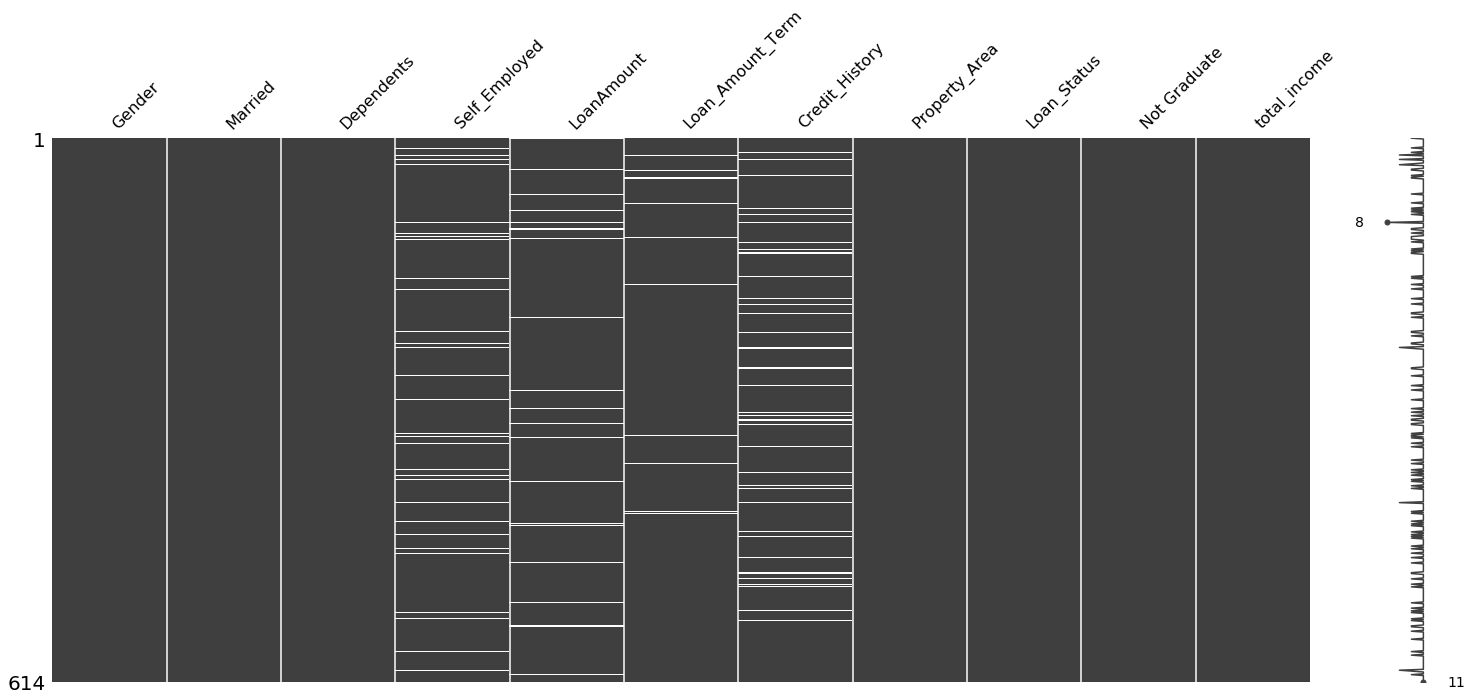

In [269]:
ms.matrix(data)

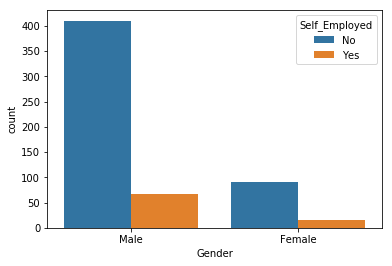

In [270]:
ses.countplot(x='Gender',hue='Self_Employed',data=data)

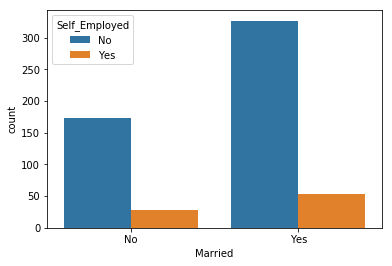

In [271]:
ses.countplot(x='Married',hue='Self_Employed',data=data)

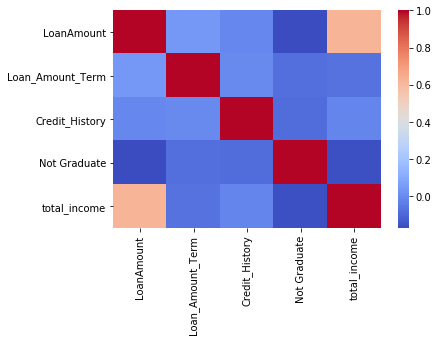

In [272]:
ses.heatmap(data.corr(),cmap='coolwarm')

In [273]:
for i in range(len(id)):
    if pd.isnull(data['Self_Employed'][i]):
        if data['Gender'][i]=='Male':
            data['Self_Employed'][i]='No'
        else:
            data['Self_Employed'][i]='Yes'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


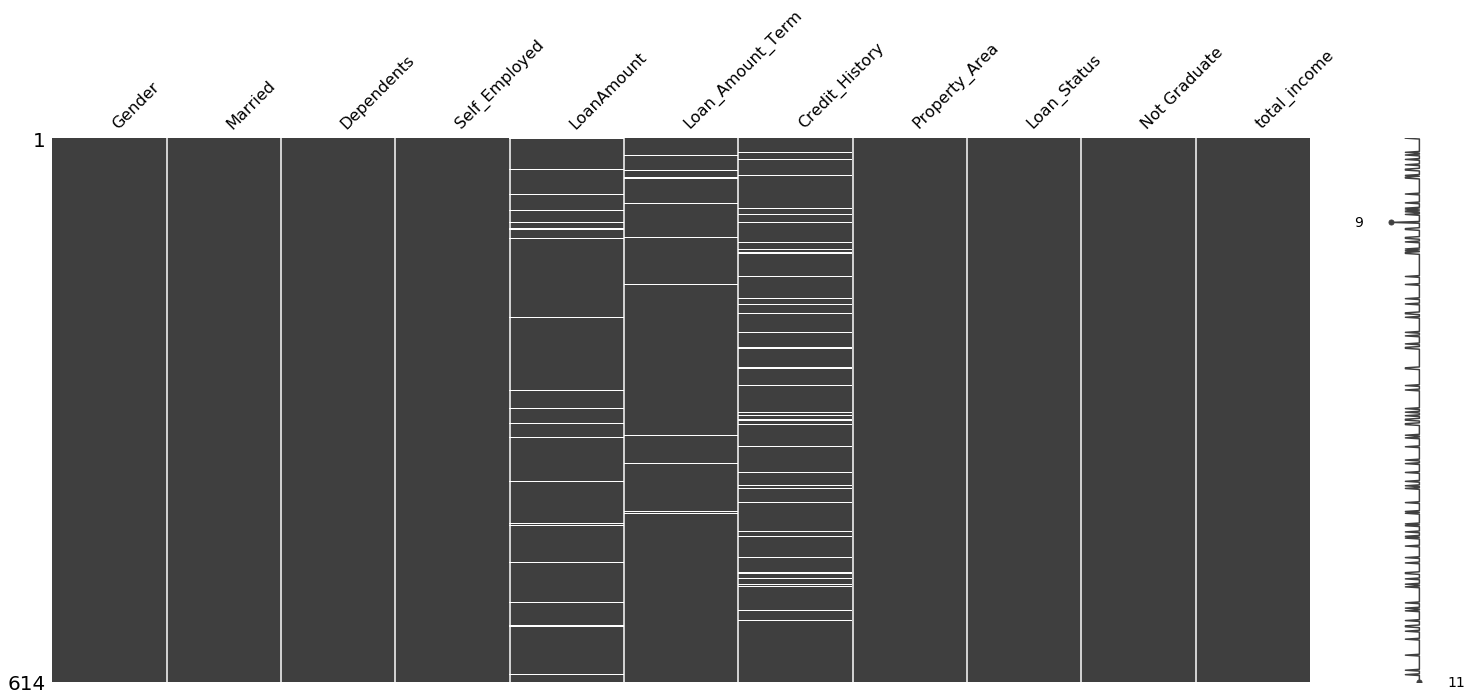

In [274]:
ms.matrix(data)

In [275]:
data.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Not Graduate,total_income
0,Male,No,0,No,NaN,360.0,1.0,Urban,Y,0,5849.0
1,Male,Yes,1,No,128.0,360.0,1.0,Rural,N,0,6091.0
2,Male,Yes,0,Yes,66.0,360.0,1.0,Urban,Y,0,3000.0
3,Male,Yes,0,No,120.0,360.0,1.0,Urban,Y,1,4941.0
4,Male,No,0,No,141.0,360.0,1.0,Urban,Y,0,6000.0


In [276]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [277]:
data['Loan_Amount_Term'].fillna(value=360.0,inplace=True)

In [278]:
data.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Not Graduate,total_income
0,Male,No,0,No,NaN,360.0,1.0,Urban,Y,0,5849.0
1,Male,Yes,1,No,128.0,360.0,1.0,Rural,N,0,6091.0
2,Male,Yes,0,Yes,66.0,360.0,1.0,Urban,Y,0,3000.0
3,Male,Yes,0,No,120.0,360.0,1.0,Urban,Y,1,4941.0
4,Male,No,0,No,141.0,360.0,1.0,Urban,Y,0,6000.0


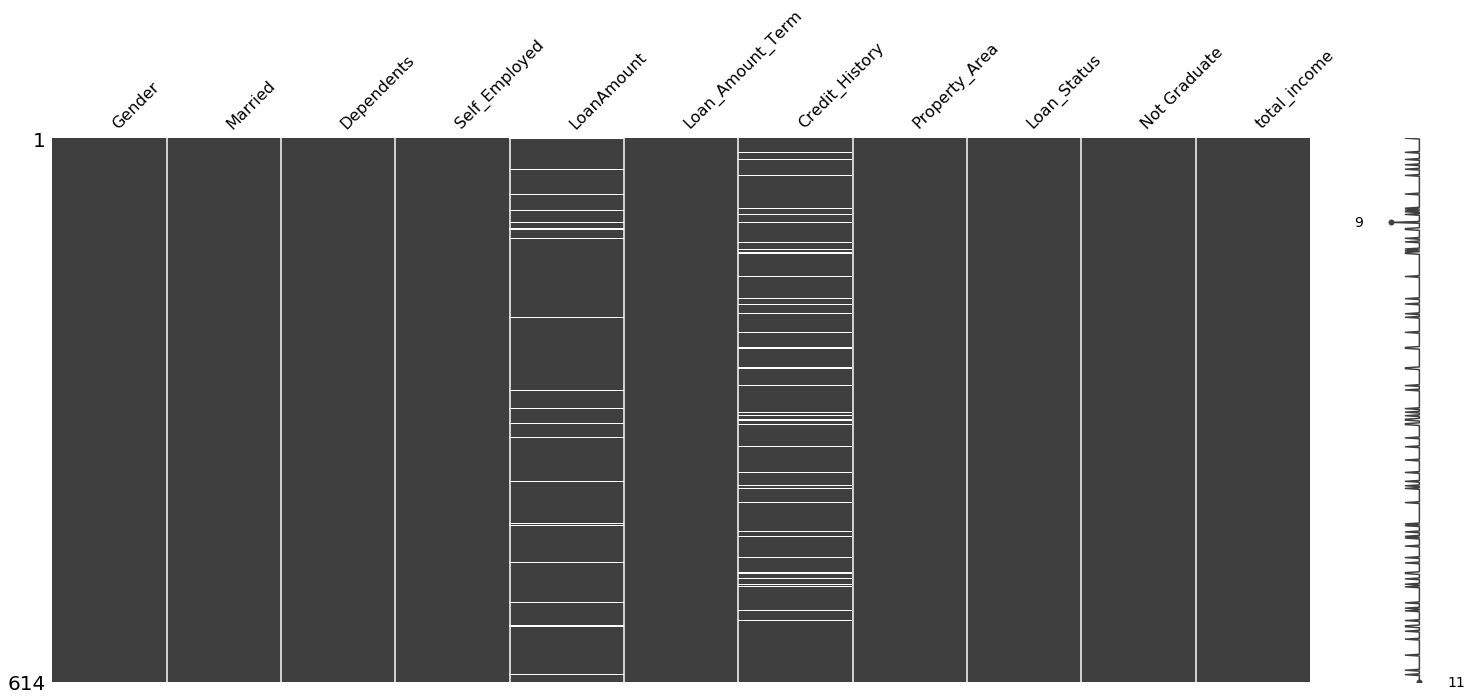

In [279]:
ms.matrix(data)

In [280]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender              614 non-null object
Married             614 non-null object
Dependents          614 non-null object
Self_Employed       614 non-null object
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Credit_History      564 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null object
Not Graduate        614 non-null uint8
total_income        614 non-null float64
dtypes: float64(4), object(6), uint8(1)
memory usage: 48.6+ KB


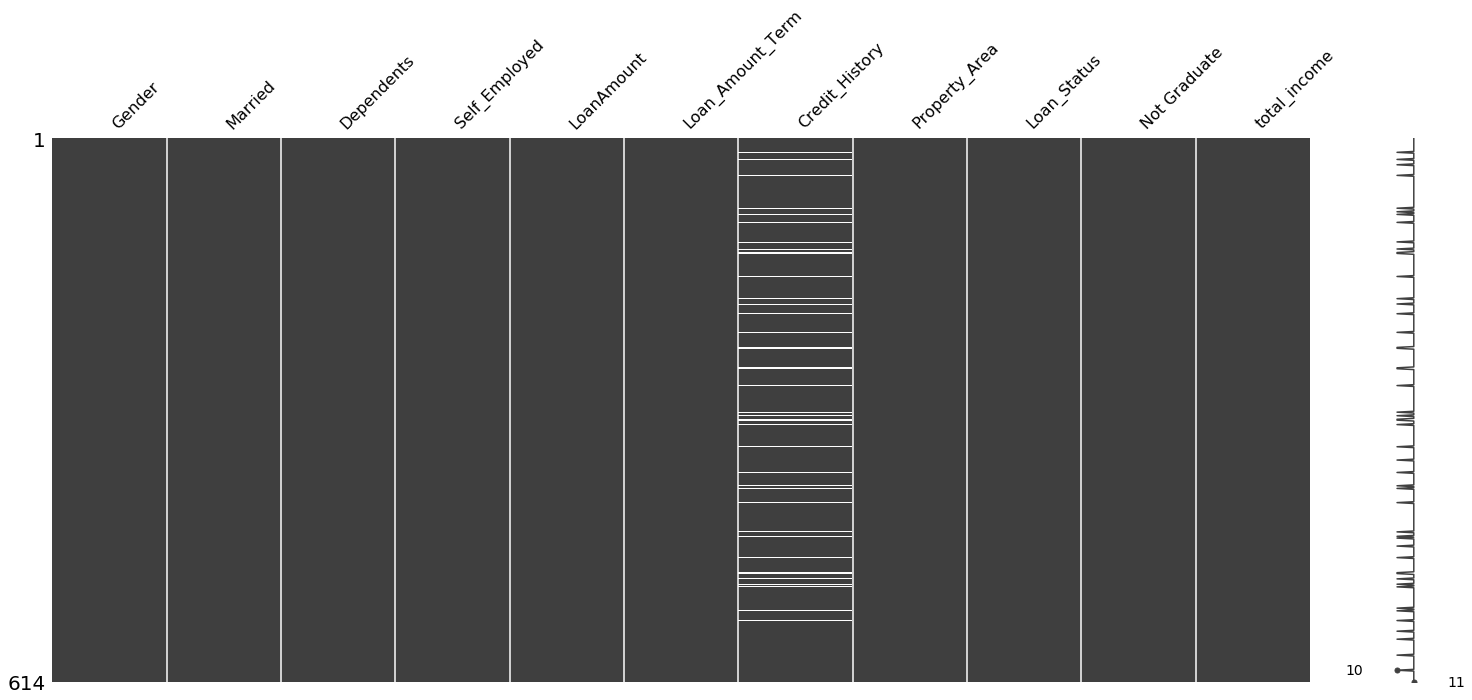

In [282]:
ms.matrix(data)

In [283]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [284]:
old_data=data.copy()

In [285]:
data.drop(['Credit_History'],axis=1,inplace=True)

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
Gender              614 non-null object
Married             614 non-null object
Dependents          614 non-null object
Self_Employed       614 non-null object
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null object
Not Graduate        614 non-null uint8
total_income        614 non-null float64
dtypes: float64(3), object(6), uint8(1)
memory usage: 43.8+ KB


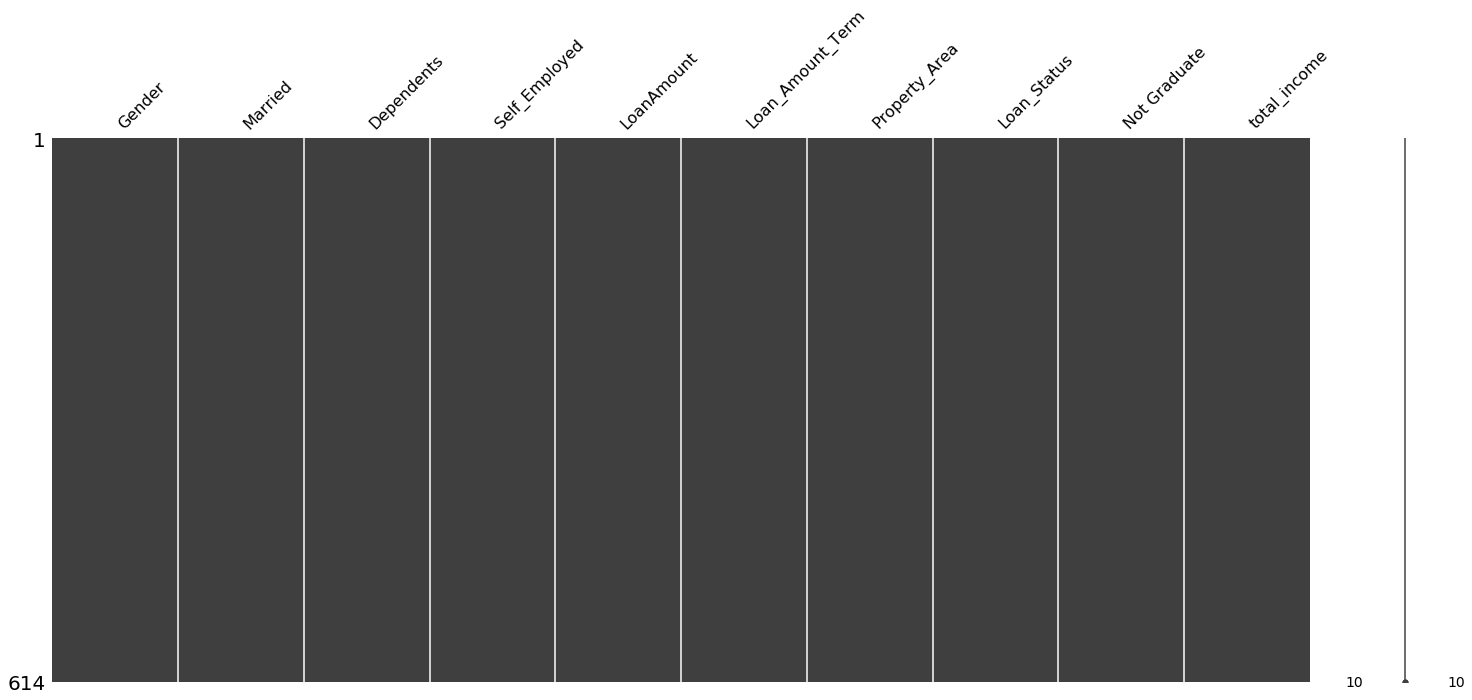

In [287]:
ms.matrix(data)

In [288]:
data.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Not Graduate,total_income
0,Male,No,0,No,146.412162,360.0,Urban,Y,0,5849.0
1,Male,Yes,1,No,128.000000,360.0,Rural,N,0,6091.0
2,Male,Yes,0,Yes,66.000000,360.0,Urban,Y,0,3000.0
3,Male,Yes,0,No,120.000000,360.0,Urban,Y,1,4941.0
4,Male,No,0,No,141.000000,360.0,Urban,Y,0,6000.0


In [289]:
gender=pd.get_dummies(data['Gender'],drop_first=True)

In [290]:
gender.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [291]:
marry=pd.get_dummies(data['Married'],drop_first=True)
self_emp=pd.get_dummies(data['Self_Employed'],drop_first=True)
dep=pd.get_dummies(data['Dependents'],drop_first=True)
prop_area=pd.get_dummies(data['Property_Area'],drop_first=True)
status=pd.get_dummies(data['Loan_Status'],drop_first=True)

In [292]:
data=pd.concat([data,marry,self_emp,dep,prop_area,status],axis=1)

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
Gender              614 non-null object
Married             614 non-null object
Dependents          614 non-null object
Self_Employed       614 non-null object
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null object
Not Graduate        614 non-null uint8
total_income        614 non-null float64
Yes                 614 non-null uint8
Yes                 614 non-null uint8
0                   614 non-null uint8
1                   614 non-null uint8
2                   614 non-null uint8
3+                  614 non-null uint8
Semiurban           614 non-null uint8
Urban               614 non-null uint8
Y                   614 non-null uint8
dtypes: float64(3), object(6), uint8(10)
memory usage: 49.2+ KB


In [294]:
data.drop(['Gender','Married','Dependents','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Not Graduate        614 non-null uint8
total_income        614 non-null float64
Yes                 614 non-null uint8
Yes                 614 non-null uint8
0                   614 non-null uint8
1                   614 non-null uint8
2                   614 non-null uint8
3+                  614 non-null uint8
Semiurban           614 non-null uint8
Urban               614 non-null uint8
Y                   614 non-null uint8
dtypes: float64(3), uint8(10)
memory usage: 20.5 KB


In [296]:
from sklearn.linear_model import LogisticRegression

In [297]:
from sklearn.ensemble import RandomForestClassifier

In [298]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(['Y'],axis=1),data['Y'],test_size=0.33,random_state=53)

In [299]:
rf=RandomForestClassifier(random_state=53)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=53, verbose=0, warm_start=False)

In [300]:
predict=rf.predict(X_test)

In [301]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

In [302]:
print(confusion_matrix(y_test,predict))

[[ 14  55]
 [ 24 110]]


In [303]:
print(accuracy_score(y_test,predict))

0.6108374384236454


In [304]:
print(precision_score(y_test,predict))

0.6666666666666666


In [305]:
print(recall_score(y_test,predict))

0.8208955223880597


In [315]:
test_data=pd.read_csv('test_bank.csv')

In [316]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [317]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [318]:
idv=test_data['Loan_ID']
data.drop('Loan_ID',axis=1,inplace=True)

In [319]:
edu=pd.get_dummies(test_data['Education'],drop_first=True)
test_data=pd.concat([test_data,edu],axis=1)
test_data.drop(['Education'],axis=1,inplace=True)

not_grad=test_data['Not Graduate']
gender=test_data['Gender']
for i in range(len(idv)):
    if pd.isnull(gender[i]):
        if not_grad[i]==0:
            gender[i]='Male'
        else:
            gender[i]='Female'
            
mar=test_data['Married']
inc=test_data['ApplicantIncome']
for i in range(len(idv)):
    if pd.isnull(mar[i]):
        if inc[i]>=inc.mean():
            mar[i]='Yes'
        else:
            mar[i]='No'

total_income=test_data['ApplicantIncome']+test_data['CoapplicantIncome']
total_income1=pd.DataFrame(total_income,columns=['total_income'])
test_data=pd.concat([test_data,total_income1],axis=1)
test_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

for i in range(len(idv)):
    if pd.isnull(test_data['Dependents'][i]):
        if test_data['Gender'][i]=='Male':
            test_data['Dependents'][i]=0
        else:
            test_data['Dependents'][i]=0

for i in range(len(idv)):
    if pd.isnull(test_data['Self_Employed'][i]):
        if test_data['Gender'][i]=='Male':
            test_data['Self_Employed'][i]='No'
        else:
            test_data['Self_Employed'][i]='Yes'

test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace=True)

test_data.drop(['Credit_History'],axis=1,inplace=True)
test_data['Loan_Amount_Term'].fillna(value=360.0,inplace=True)
gender=pd.get_dummies(test_data['Gender'],drop_first=True)

marry=pd.get_dummies(test_data['Married'],drop_first=True)
self_emp=pd.get_dummies(test_data['Self_Employed'],drop_first=True)
dep=pd.get_dummies(test_data['Dependents'],drop_first=True)
prop_area=pd.get_dummies(test_data['Property_Area'],drop_first=True)
test_data=pd.concat([test_data,marry,self_emp,dep,prop_area],axis=1)
test_data.drop(['Gender','Married','Dependents','Self_Employed','Property_Area'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: Sett

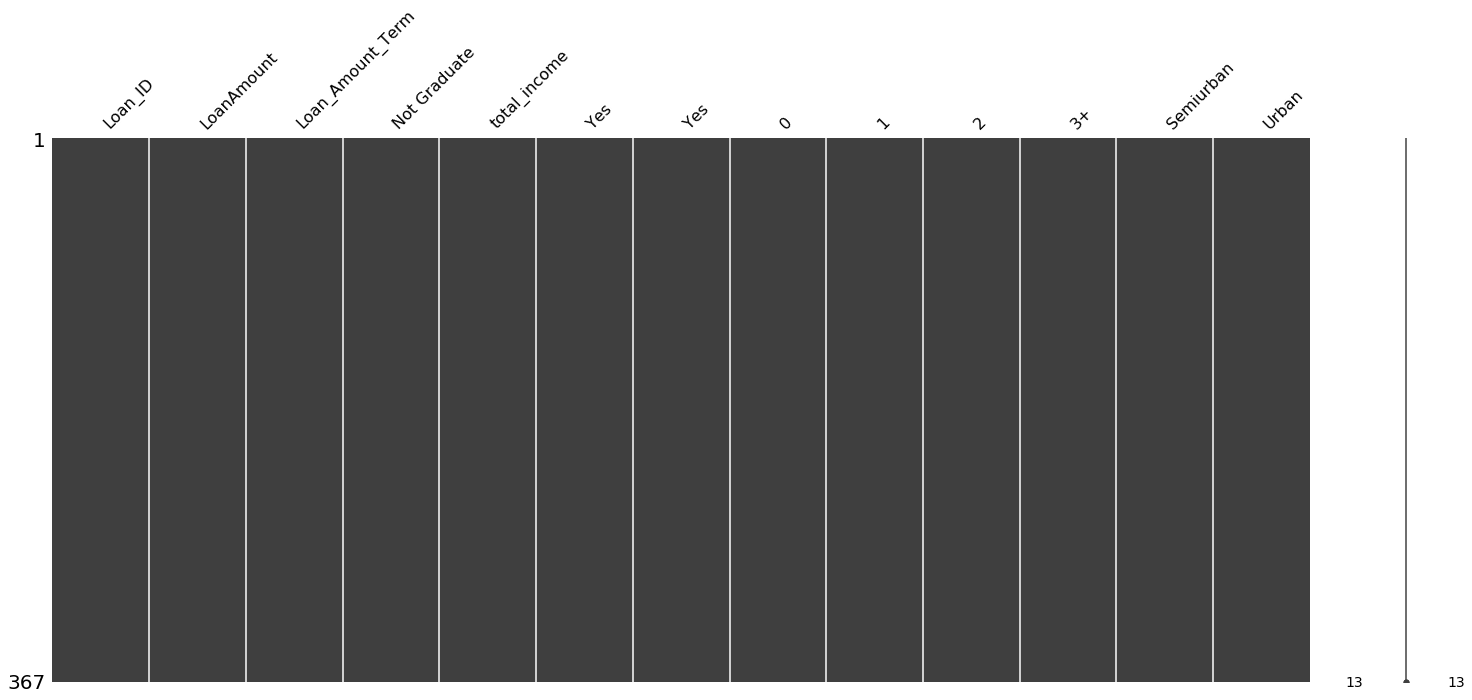

In [320]:
ms.matrix(test_data)

In [323]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID             367 non-null object
LoanAmount          367 non-null float64
Loan_Amount_Term    367 non-null float64
Not Graduate        367 non-null uint8
total_income        367 non-null int64
Yes                 367 non-null uint8
Yes                 367 non-null uint8
0                   367 non-null uint8
1                   367 non-null uint8
2                   367 non-null uint8
3+                  367 non-null uint8
Semiurban           367 non-null uint8
Urban               367 non-null uint8
dtypes: float64(2), int64(1), object(1), uint8(9)
memory usage: 14.8+ KB


In [324]:
test_data.drop('Loan_ID',axis=1,inplace=True)

In [325]:
ans=rf.predict(test_data)

In [327]:
df1=pd.DataFrame(idv,columns=['Loan_ID'])

In [328]:
df2=pd.DataFrame(ans,columns=['Loan_Status'])

In [329]:
answer=pd.concat([df1,df2],axis=1)

In [330]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
Loan_ID        367 non-null object
Loan_Status    367 non-null uint8
dtypes: object(1), uint8(1)
memory usage: 3.3+ KB


In [332]:
answer.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0


In [337]:
loan=answer['Loan_Status']

In [340]:
type(loan)
for i in range(len(loan)):
    if loan[i]==1:
        loan[i]='Y'
    else:
        loan[i]='N'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [341]:
answer.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [342]:
answer.to_csv('answer.csv',index=False)